# Tarea 1 Análisis de datos

Referencia: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024

## Description

This dataset presents a comprehensive compilation of the most streamed songs on Spotify in 2024. It provides extensive insights into each track's attributes, popularity, and presence on various music platforms, offering a valuable resource for music analysts, enthusiasts, and industry professionals. The dataset includes information such as track name, artist, release date, ISRC, streaming statistics, and presence on platforms like YouTube, TikTok, and more.

## Key Features

- Track Name: Name of the song.
- Album Name: Name of the album the song belongs to.
- Artist: Name of the artist(s) of the song.
- Release Date: Date when the song was released.
- ISRC: International Standard Recording Code for the song.
- All Time Rank: Ranking of the song based on its all-time popularity.
- Track Score: Score assigned to the track based on various factors.
- Spotify Streams: Total number of streams on Spotify.
- Spotify Playlist Count: Number of Spotify playlists the song is included in.
- Spotify Playlist Reach: Reach of the song across Spotify playlists.
- Spotify Popularity: Popularity score of the song on Spotify.
- YouTube Views: Total views of the song's official video on YouTube.
- YouTube Likes: Total likes on the song's official video on YouTube.
- TikTok Posts: Number of TikTok posts featuring the song.
- TikTok Likes: Total likes on TikTok posts featuring the song.
- TikTok Views: Total views on TikTok posts featuring the song.
- YouTube Playlist Reach: Reach of the song across YouTube playlists.
- Apple Music Playlist Count: Number of Apple Music playlists the song is included in.
- AirPlay Spins: Number of times the song has been played on radio stations.
- SiriusXM Spins: Number of times the song has been played on SiriusXM.
- Deezer Playlist Count: Number of Deezer playlists the song is included in.
- Deezer Playlist Reach: Reach of the song across Deezer playlists.
- Amazon Playlist Count: Number of Amazon Music playlists the song is included in.
- Pandora Streams: Total number of streams on Pandora.
- Pandora Track Stations: Number of Pandora stations featuring the song.
- Soundcloud Streams: Total number of streams on Soundcloud.
- Shazam Counts: Total number of times the song has been Shazamed.
- TIDAL Popularity: Popularity score of the song on TIDAL.
- Explicit Track: Indicates whether the song contains explicit content.

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler

import joblib

In [226]:
df = pd.read_csv('https://raw.githubusercontent.com/desareca/Tareas_Analisis_Datos-G6/main/Most%20Streamed%20Spotify%20Songs%202024.csv', encoding='ISO-8859-1')

In [227]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [228]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Track,4600,4370,Danza Kuduro - Cover,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album Name,4600,4005,Un Verano Sin Ti,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist,4595,1999,Drake,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release Date,4600,1562,1/1/2012,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISRC,4600,4598,USWL11700269,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All Time Rank,4600,4577,"3,441",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Track Score,4600.0,NaN,NaN,NaN,41.844043,38.543766,19.4,23.3,29.9,44.425,725.4
Spotify Streams,4487,4425,"1,655,575,417",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spotify Playlist Count,4530,4207,1,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spotify Playlist Reach,4528,4478,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
# Elimina columna TIDAL Popularity, son todos NaN
df = df.drop('TIDAL Popularity', axis=1)

In [230]:
# EL codigo ISRC es único por lo que se deben eliminar duplicados
# Primero revisamos si tienen la misma info
# Referencia: https://isrc.ifpi.org/es/
cancion_repetida = (df.groupby('ISRC')['ISRC'].count()>1)
df[df['ISRC'].isin(cancion_repetida[cancion_repetida].index)].T

,2449,2450,3447,3450
Track,Tennessee Orange,Tennessee Orange,Dembow,Dembow
Album Name,Tennessee Orange,Tennessee Orange,Dembow,Dembow
Artist,Megan Moroney,Megan Moroney,Danny Ocean,Danny Ocean
Release Date,9/2/2022,9/2/2022,12/8/2017,12/8/2017
ISRC,TCAGJ2289254,TCAGJ2289254,USWL11700269,USWL11700269
All Time Rank,"2,424","2,424","3,441","3,441"
Track Score,28.9,28.9,23.3,23.3
Spotify Streams,"227,893,586","227,893,586","579,189,526","579,189,526"
Spotify Playlist Count,"28,139","28,139","60,397","60,397"
Spotify Playlist Reach,"12,480,714","12,480,714","11,805,084","11,805,084"


In [231]:
# Se eliminan los duiplicados
df = df.drop_duplicates(subset='ISRC')

In [232]:
df[df['Artist'].isna()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
311,Cool,JnD Mix,NaN,5/25/2024,QZNWQ2410638,311,86.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,624,577",0
480,I Wanna Party,I Wanna Party - Single,NaN,5/31/2024,QZYFZ2445017,482,70.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1345,Marlboro Remix,Marlboro Remix - Single,NaN,6/7/2024,QZNWT2471497,"1,343",40.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"504,979",0
1561,Melting,Melting - Single,NaN,6/10/2024,QZNWU2402635,"1,553",37.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"289,134",0
3402,La ï¿½ï¿½ltima Vez (Yo Te Per,La ï¿½ï¿½ltima Vez (Yo Te Perdï¿½ï¿½),NaN,5/2/2024,MX2832415361,"3,381",23.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,606,561",0


In [233]:
df[df['Artist'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 311 to 3402
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       5 non-null      object 
 1   Album Name                  5 non-null      object 
 2   Artist                      0 non-null      object 
 3   Release Date                5 non-null      object 
 4   ISRC                        5 non-null      object 
 5   All Time Rank               5 non-null      object 
 6   Track Score                 5 non-null      float64
 7   Spotify Streams             0 non-null      object 
 8   Spotify Playlist Count      0 non-null      object 
 9   Spotify Playlist Reach      0 non-null      object 
 10  Spotify Popularity          0 non-null      float64
 11  YouTube Views               0 non-null      object 
 12  YouTube Likes               0 non-null      object 
 13  TikTok Posts                0 non-null 

In [234]:
# Se eliminan las canciones sin artista, son sólo 5.
# Estas canciones solo muestran valores nulos en la mayoría de los casos.
# Dependiendo de como se defina el objetivo podría ser necesario reutilizarlo, aunque no creo.
df = df[~df['Artist'].isna()]

In [235]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4593 non-null   object 
 1   Album Name                  4593 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4593 non-null   object 
 4   ISRC                        4593 non-null   object 
 5   All Time Rank               4593 non-null   object 
 6   Track Score                 4593 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

In [237]:
# Pasamos a datetime la fecha
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')
# Agrega Año y Mes
df['Release Date Year'] = df['Release Date'].dt.year
df['Release Date Month'] = df['Release Date'].dt.month_name()

<ipython-input-237-c875b5ec3176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')
<ipython-input-237-c875b5ec3176>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release Date Year'] = df['Release Date'].dt.year
<ipython-input-237-c875b5ec3176>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [238]:
# Hay un momton de variables tipo string que son cantidades asociadas a plataformas.
cols_plataformas = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
                    'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach',
                    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'All Time Rank']

for col_p in cols_plataformas:
    df[col_p] = df[col_p].str.replace(',', '').astype(float)

<ipython-input-238-606146a820dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_p] = df[col_p].str.replace(',', '').astype(float)
<ipython-input-238-606146a820dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_p] = df[col_p].str.replace(',', '').astype(float)
<ipython-input-238-606146a820dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4593 non-null   object        
 1   Album Name                  4593 non-null   object        
 2   Artist                      4593 non-null   object        
 3   Release Date                4593 non-null   datetime64[ns]
 4   ISRC                        4593 non-null   object        
 5   All Time Rank               4593 non-null   float64       
 6   Track Score                 4593 non-null   float64       
 7   Spotify Streams             4485 non-null   float64       
 8   Spotify Playlist Count      4528 non-null   float64       
 9   Spotify Playlist Reach      4526 non-null   float64       
 10  Spotify Popularity          3794 non-null   float64       
 11  YouTube Views               4290 non-null   float64       
 1

In [240]:
# All Time Rank tiene datos repetidos, pero con data diferente, se queda de momento.
df[df['All Time Rank'].isin(df.groupby('All Time Rank')['All Time Rank'].count()[df.groupby('All Time Rank')['All Time Rank'].count()>1].index)].sort_values('All Time Rank').head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Release Date Year,Release Date Month
310,Danza Kuduro - Cover,A collection of Western music that will get yo...,MUSIC LAB JPN,2023-11-15,TCJPX2396779,355.0,86.6,1.627430e+09,12.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2023,November
355,deja vu,deja vu,Olivia Rodrigo,2021-04-01,USUG12101240,355.0,81.3,1.606976e+09,172376.0,64346126.0,...,27.0,76887.0,49.0,62922329.0,74501.0,NaN,3545397.0,1,2021,April
400,I DONï¿½ï¿½ï¿½T WANNA DO THIS A,King of the Dead,Juliï¿½ï¿½n Kh,2024-03-18,QZLL92480334,454.0,76.5,5.644448e+08,5.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2024,March
455,Unforgettable,EPIC AF,French Montana,2017-01-01,USSM11703478,454.0,72.6,2.065697e+09,275044.0,91691537.0,...,114.0,739260.0,45.0,505767047.0,265307.0,NaN,NaN,1,2017,January
553,DIME QUE,DIME QUE,Ian G.,2021-07-16,QZS632157305,559.0,65.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,210524496.0,5.0,0,2021,July


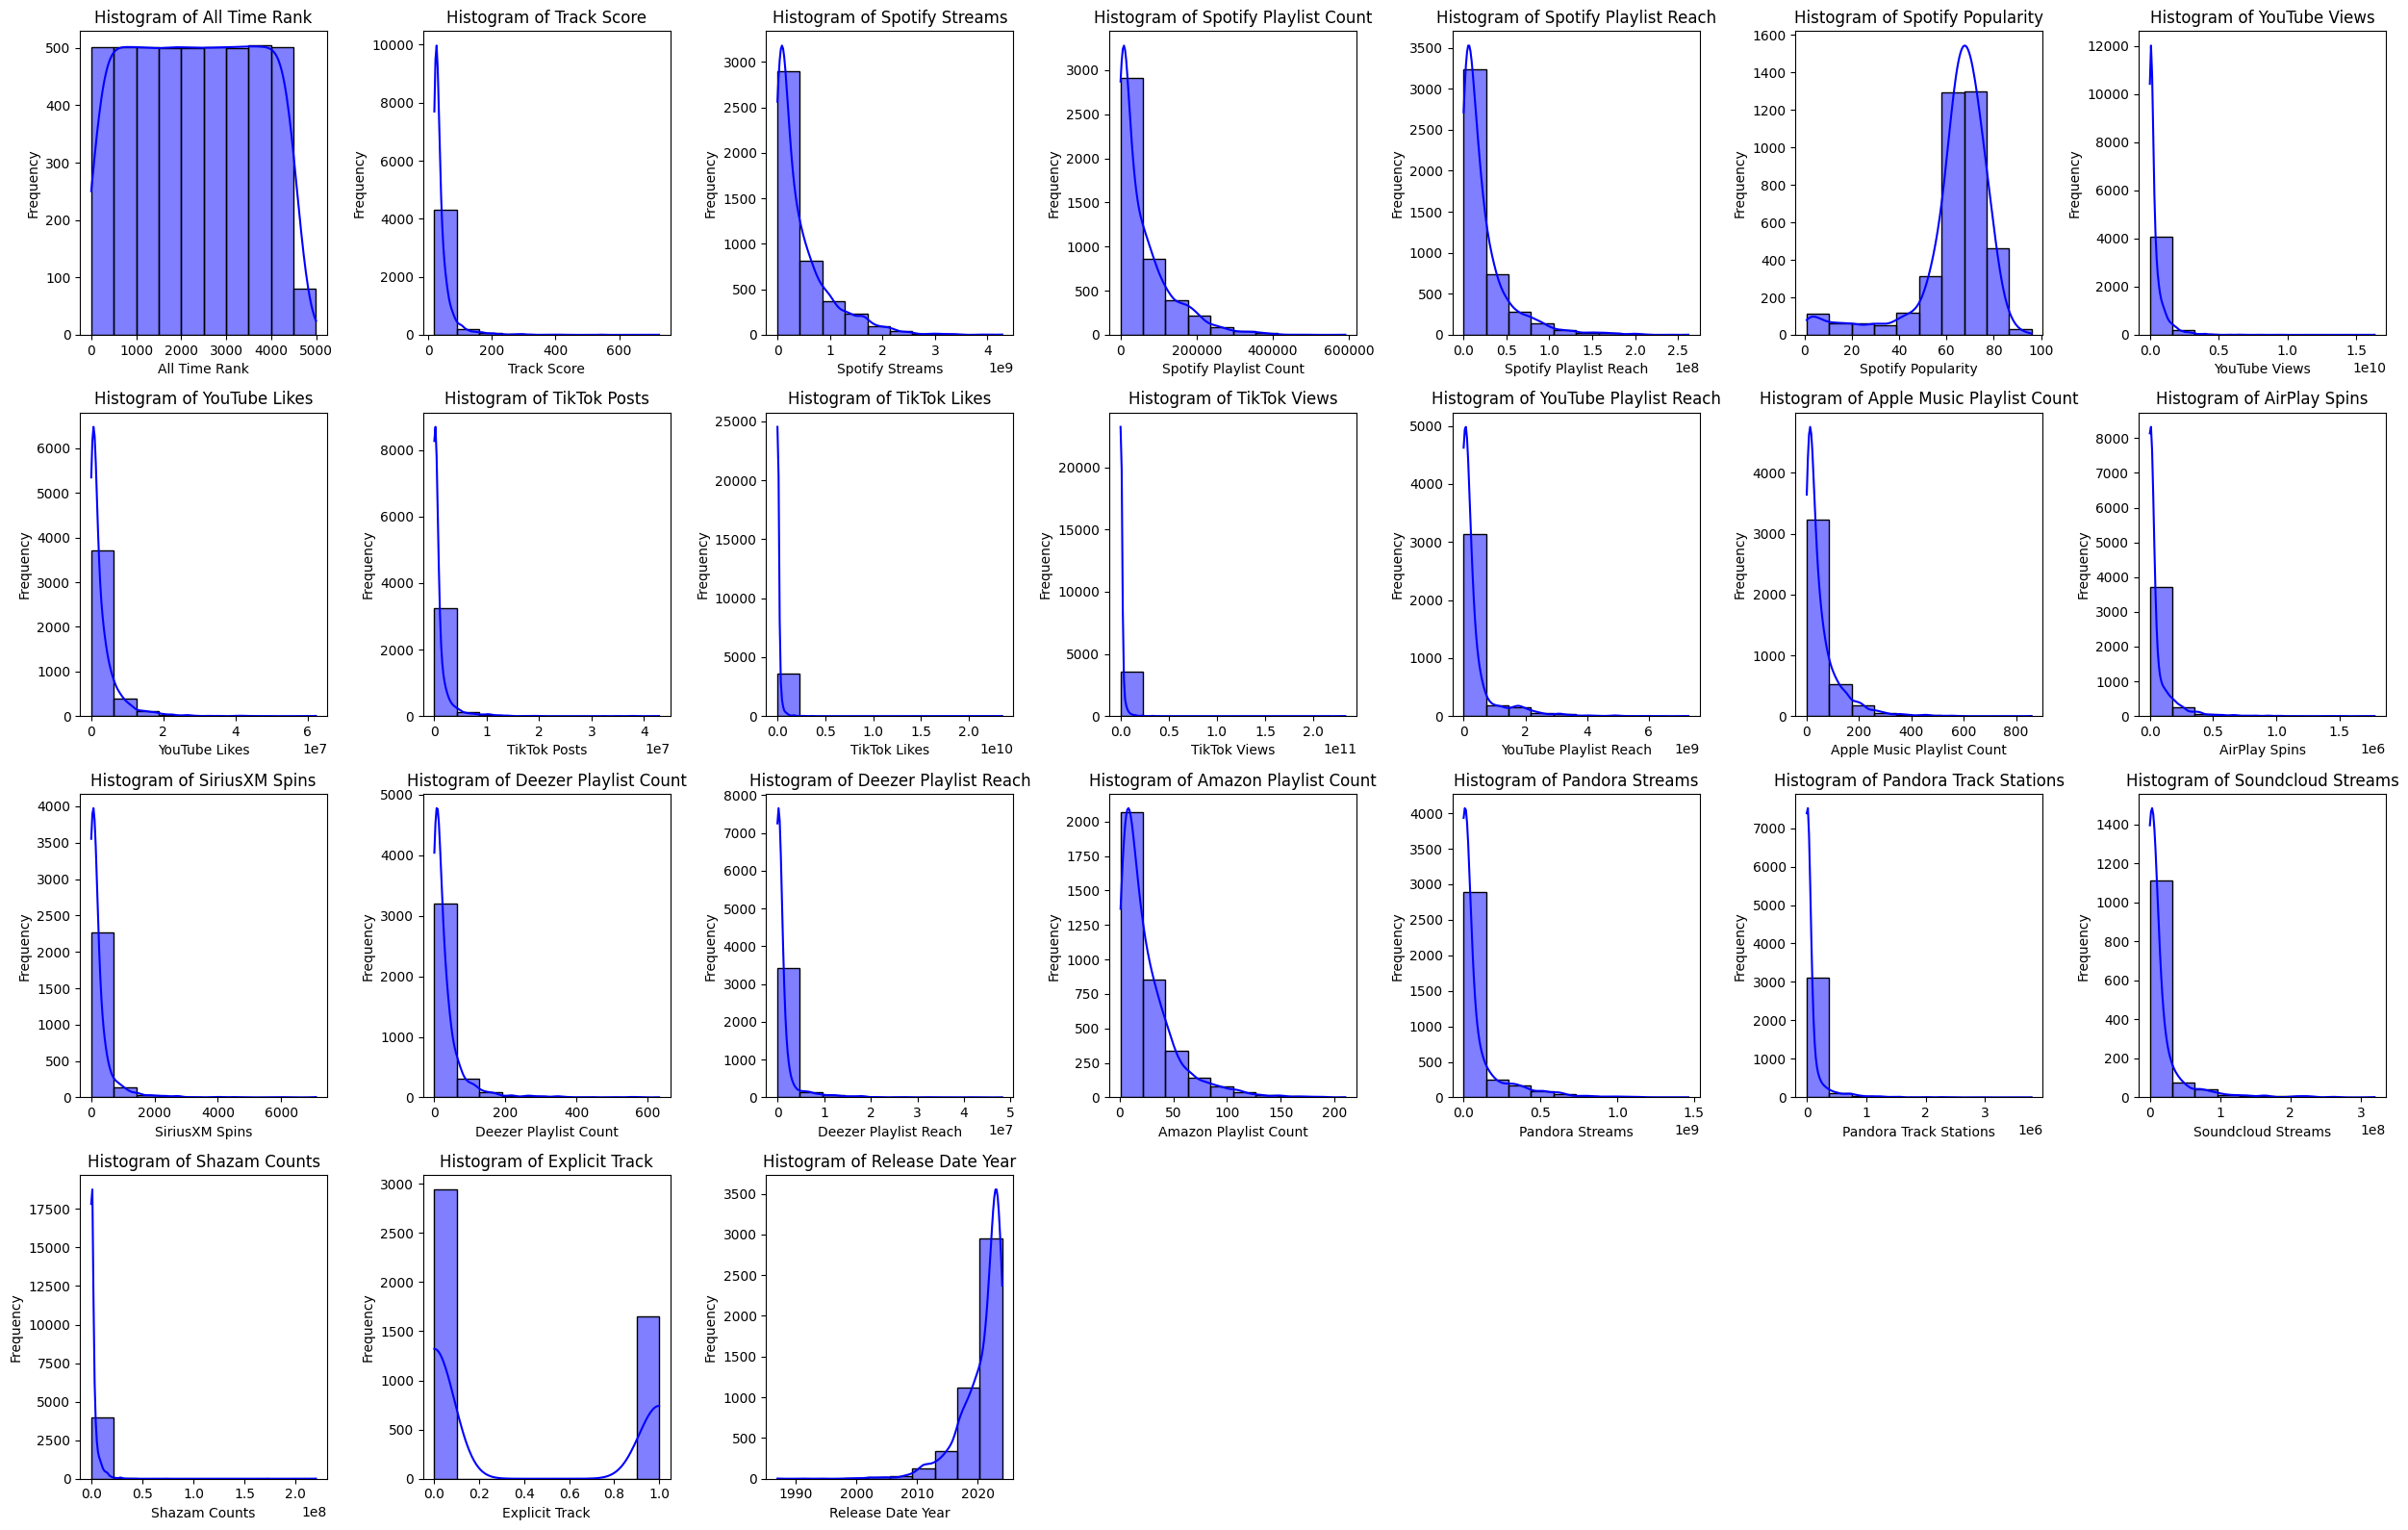

In [241]:
# Visualización Histogramas
numeric_columns = df.select_dtypes(include='number').columns

n_cols = 7
n_rows = len(numeric_columns) // n_cols + int(len(numeric_columns) % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4 * n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue', bins=10)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

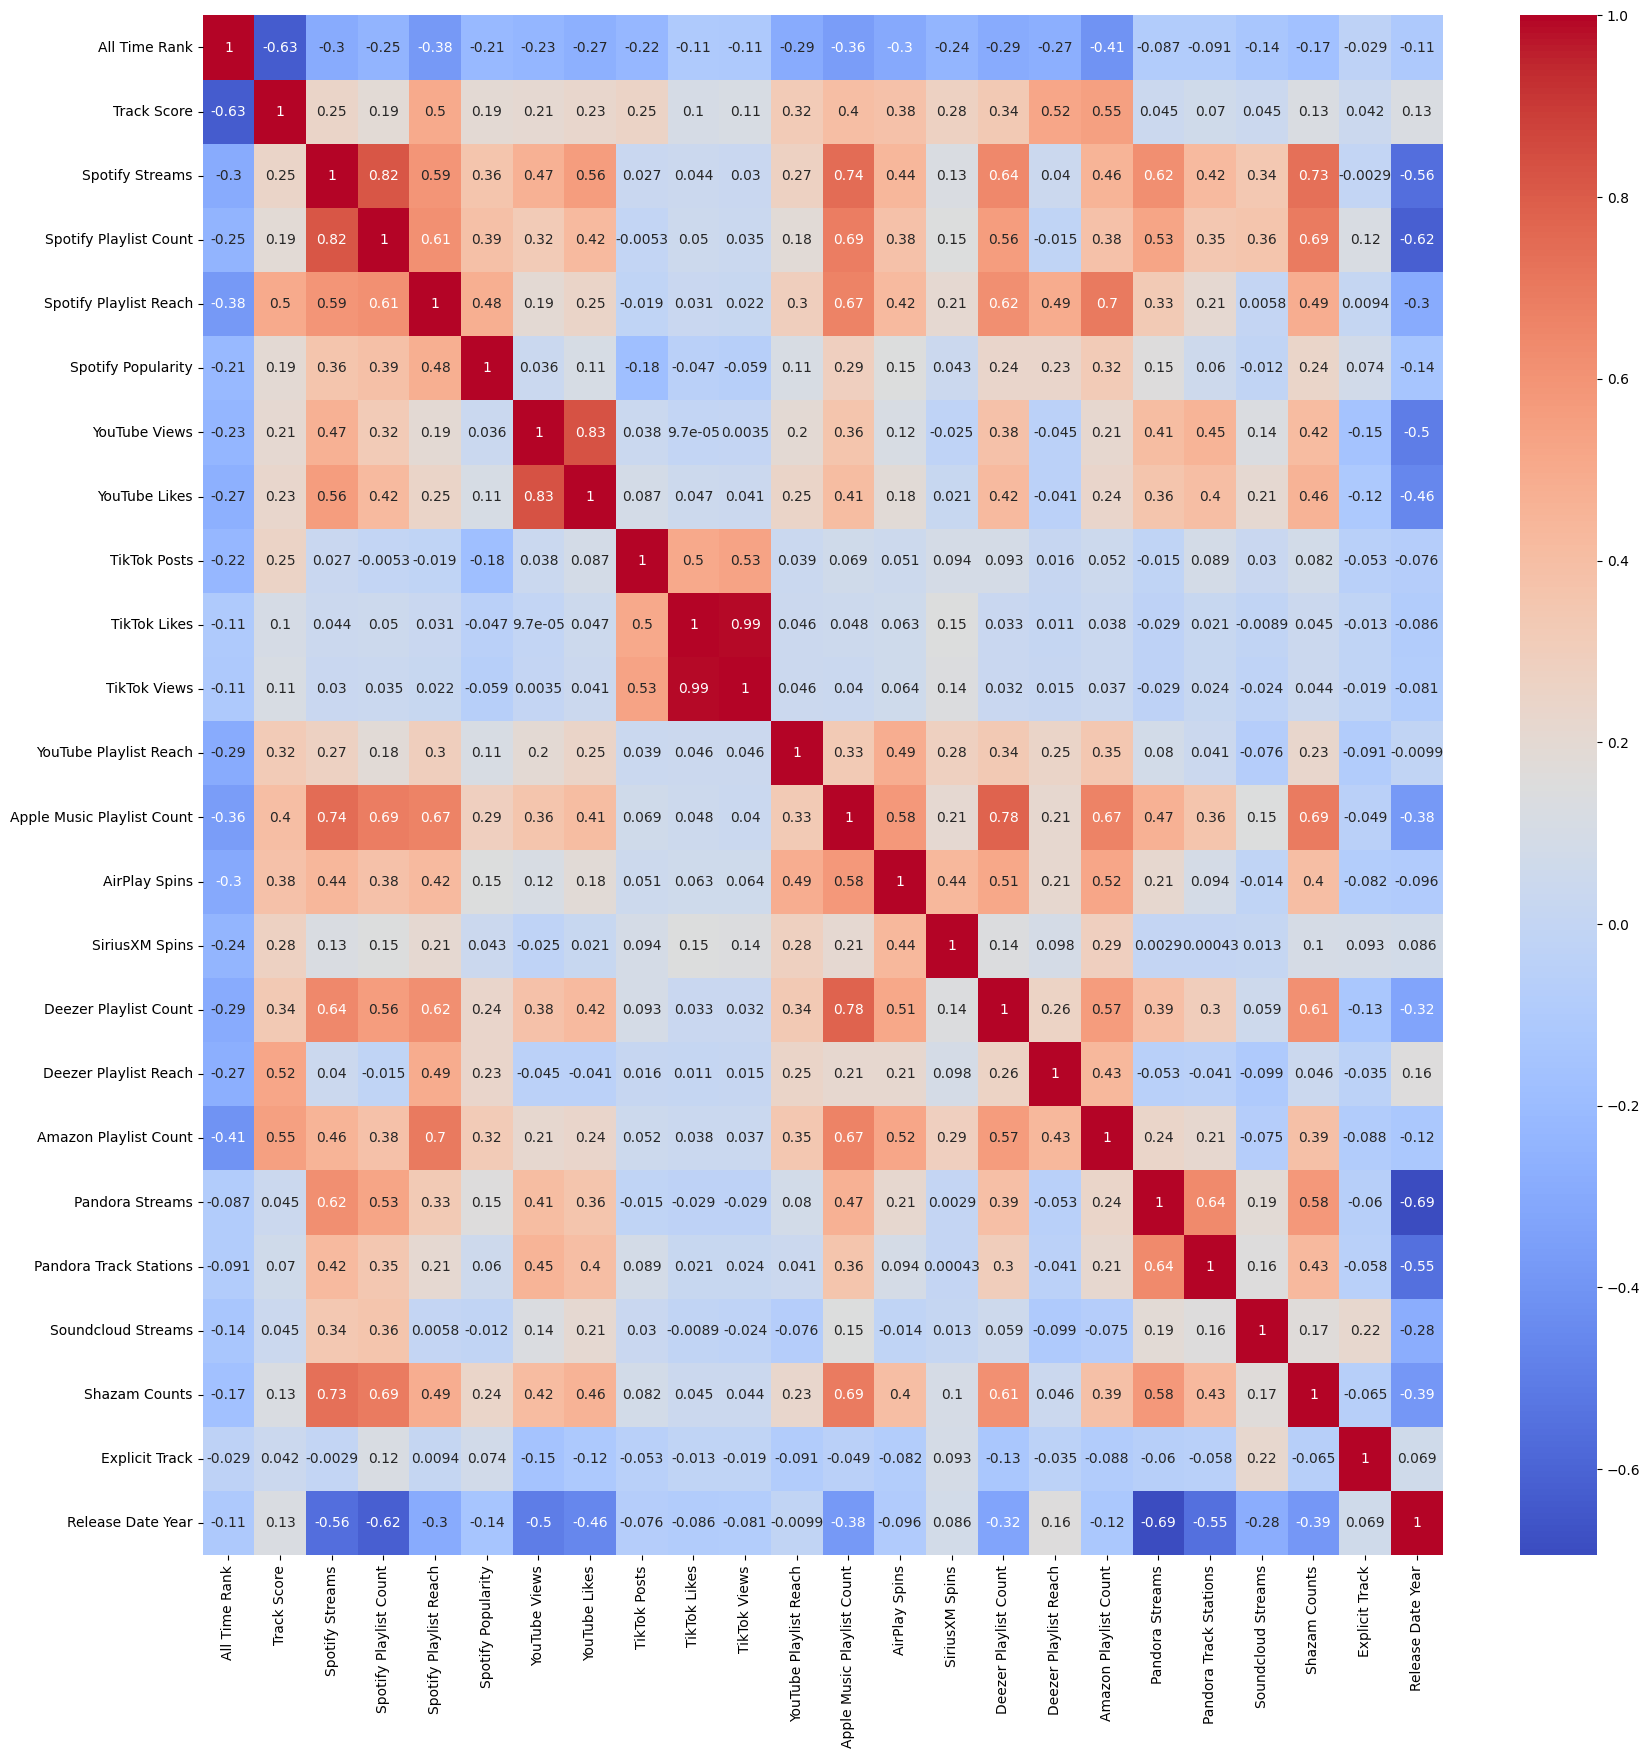

In [242]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

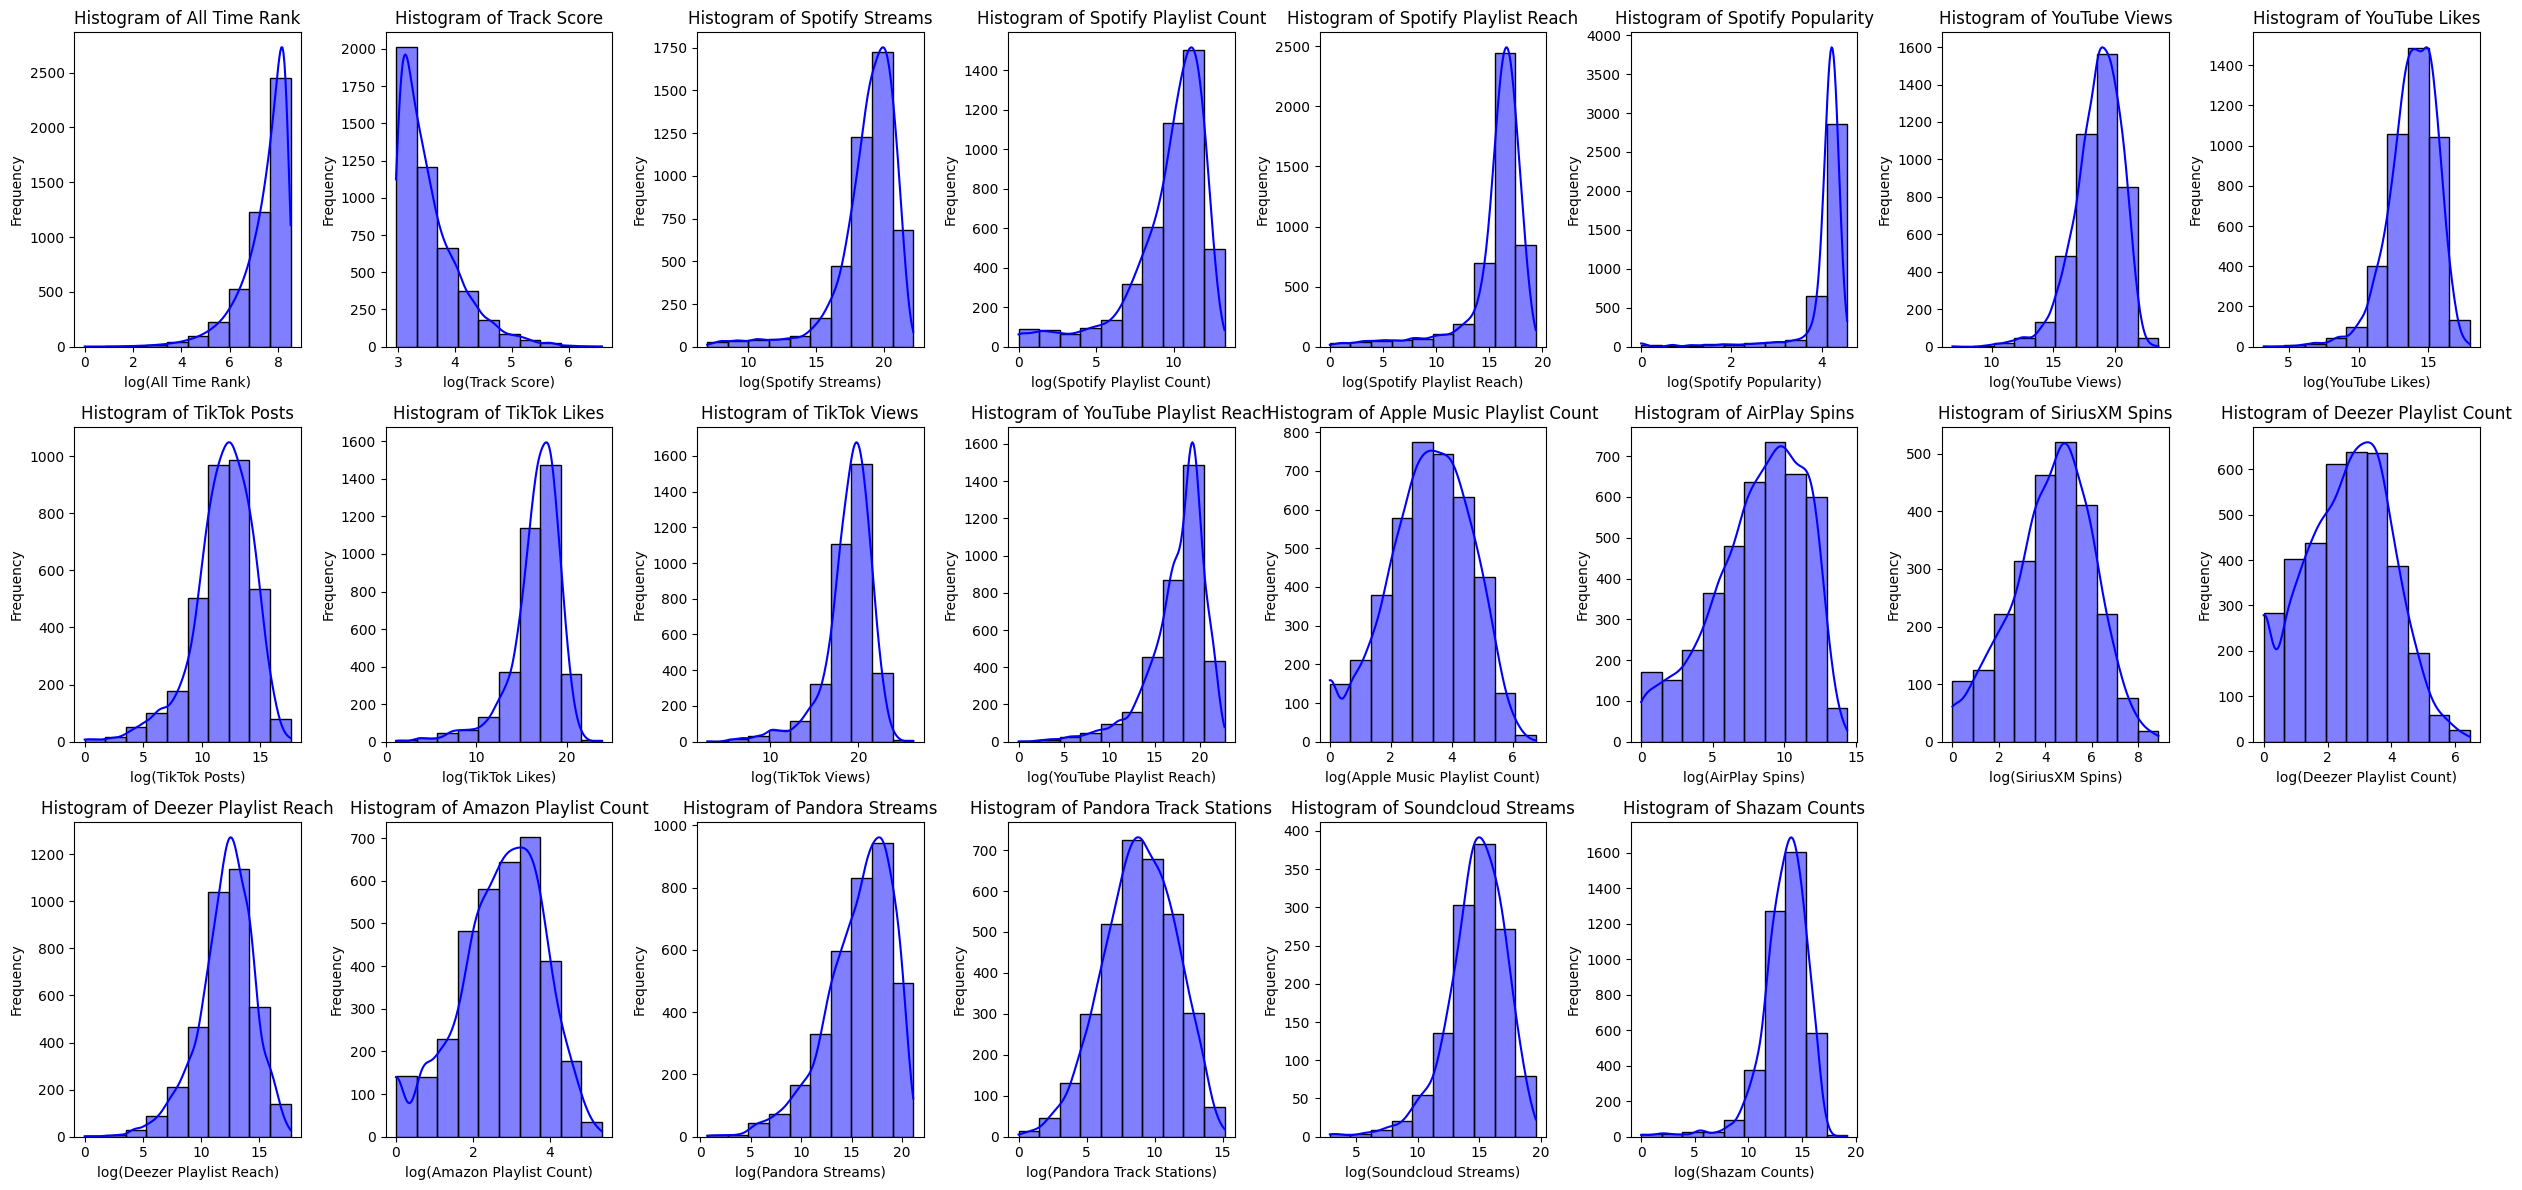

In [243]:
# Hay varias columnas numericas que al aplciar log podrían normalizar su distribucion
# Visualización Histogramas
cols_transf_log = ['All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']

n_cols = 8
n_rows = len(cols_transf_log) // n_cols + int(len(cols_transf_log) % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4 * n_rows))
axes = axes.flatten() if len(cols_transf_log) > 1 else [axes]

df_transf_log = df.copy()
for i, col in enumerate(cols_transf_log):
    df_transf_log[col] = df_transf_log[col].apply(np.log)
    sns.histplot(df_transf_log[col], kde=True, ax=axes[i], color='blue', bins=10)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(f'log({col})')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [244]:
# imputar por mediana para evitar problemas por las colas
columns_imputed = df.select_dtypes(include='number').columns
df_imputado = df_transf_log.copy()

imputer = SimpleImputer(strategy='median')
imputer.fit(df_imputado[columns_imputed])

joblib.dump(imputer, 'imputer_mediana.pkl')

imputer_loaded = joblib.load('imputer_mediana.pkl')

df_imputado[columns_imputed] = imputer_loaded.transform(df_imputado[columns_imputed])

In [245]:
# En primera instancia vamos a standarizar con la mediana y el intervalo intercuartil para disminuir el efecto de las colas
columns_normalized = df.select_dtypes(include='number').columns
df_normalizado = df_imputado.copy()

scaler = RobustScaler()
scaler.fit(df_normalizado[columns_normalized])

joblib.dump(scaler, 'scaler_mediana.pkl')

scaler_loaded = joblib.load('scaler_mediana.pkl')

df_normalizado[columns_normalized] = scaler_loaded.transform(df_normalizado[columns_normalized])

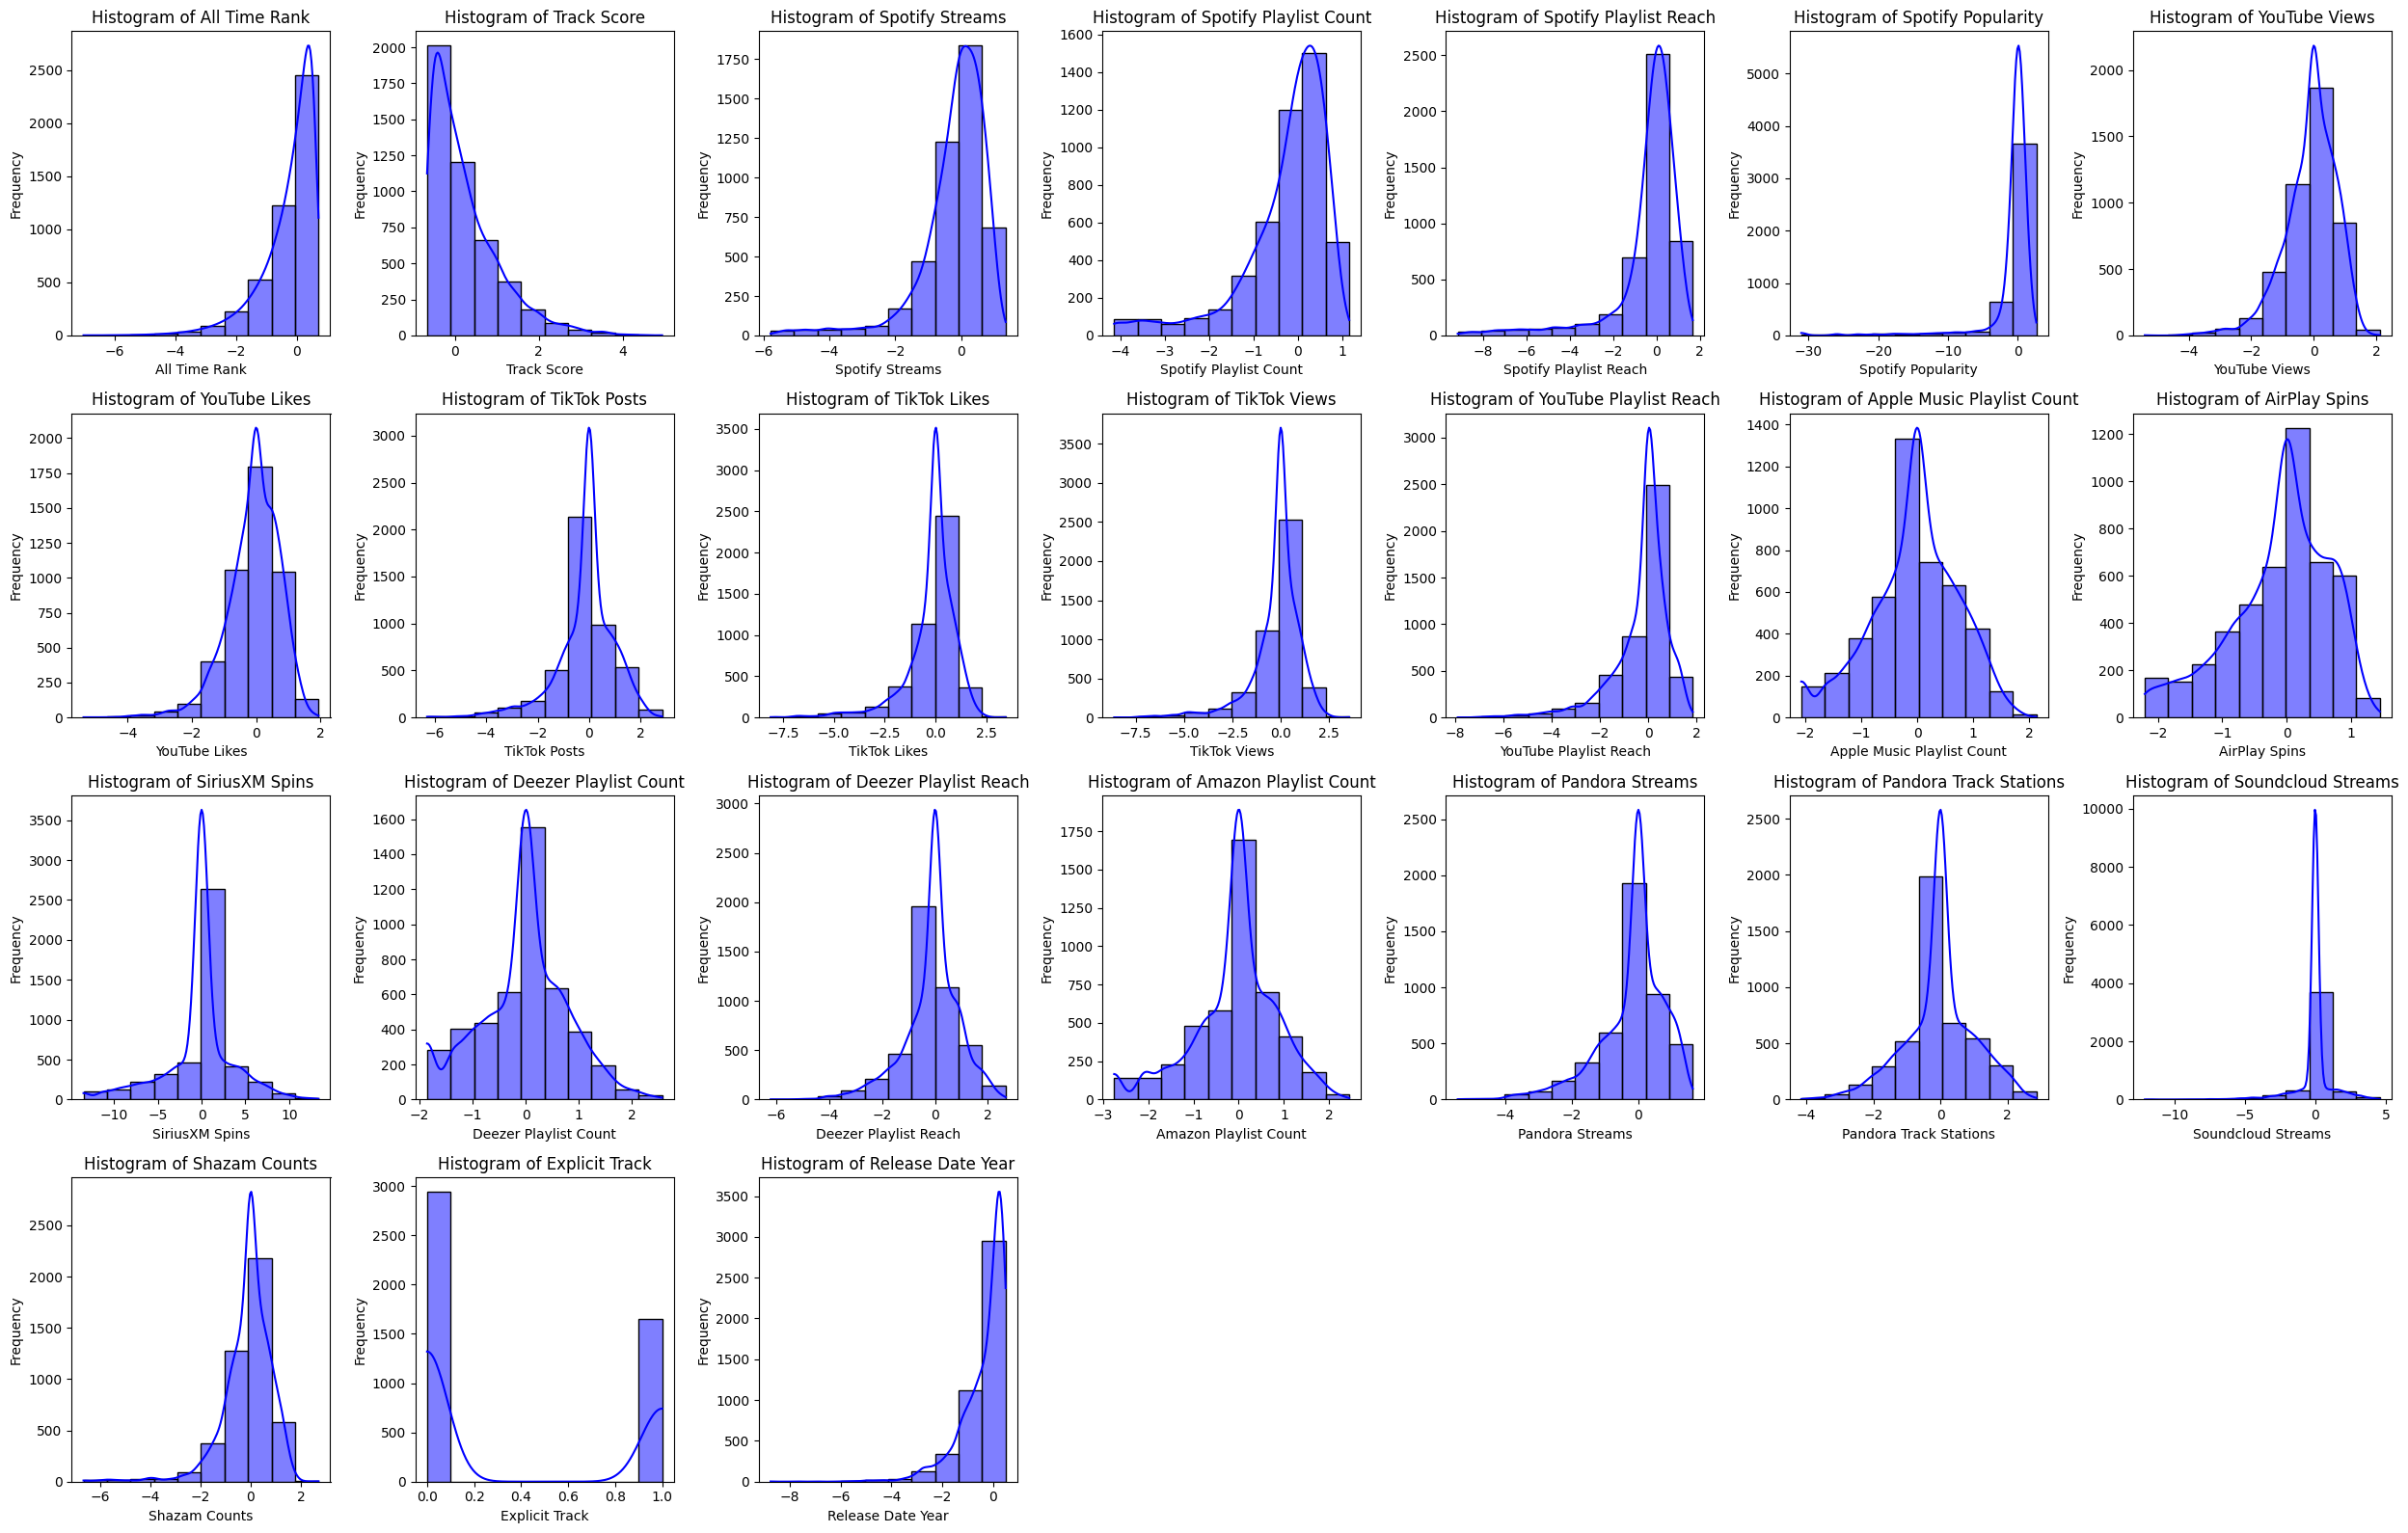

In [246]:
# Visualización Histogramas
numeric_columns = df_normalizado.select_dtypes(include='number').columns

n_cols = 7
n_rows = len(numeric_columns) // n_cols + int(len(numeric_columns) % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4 * n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for i, col in enumerate(numeric_columns):
    sns.histplot(df_normalizado[col], kde=True, ax=axes[i], color='blue', bins=10)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

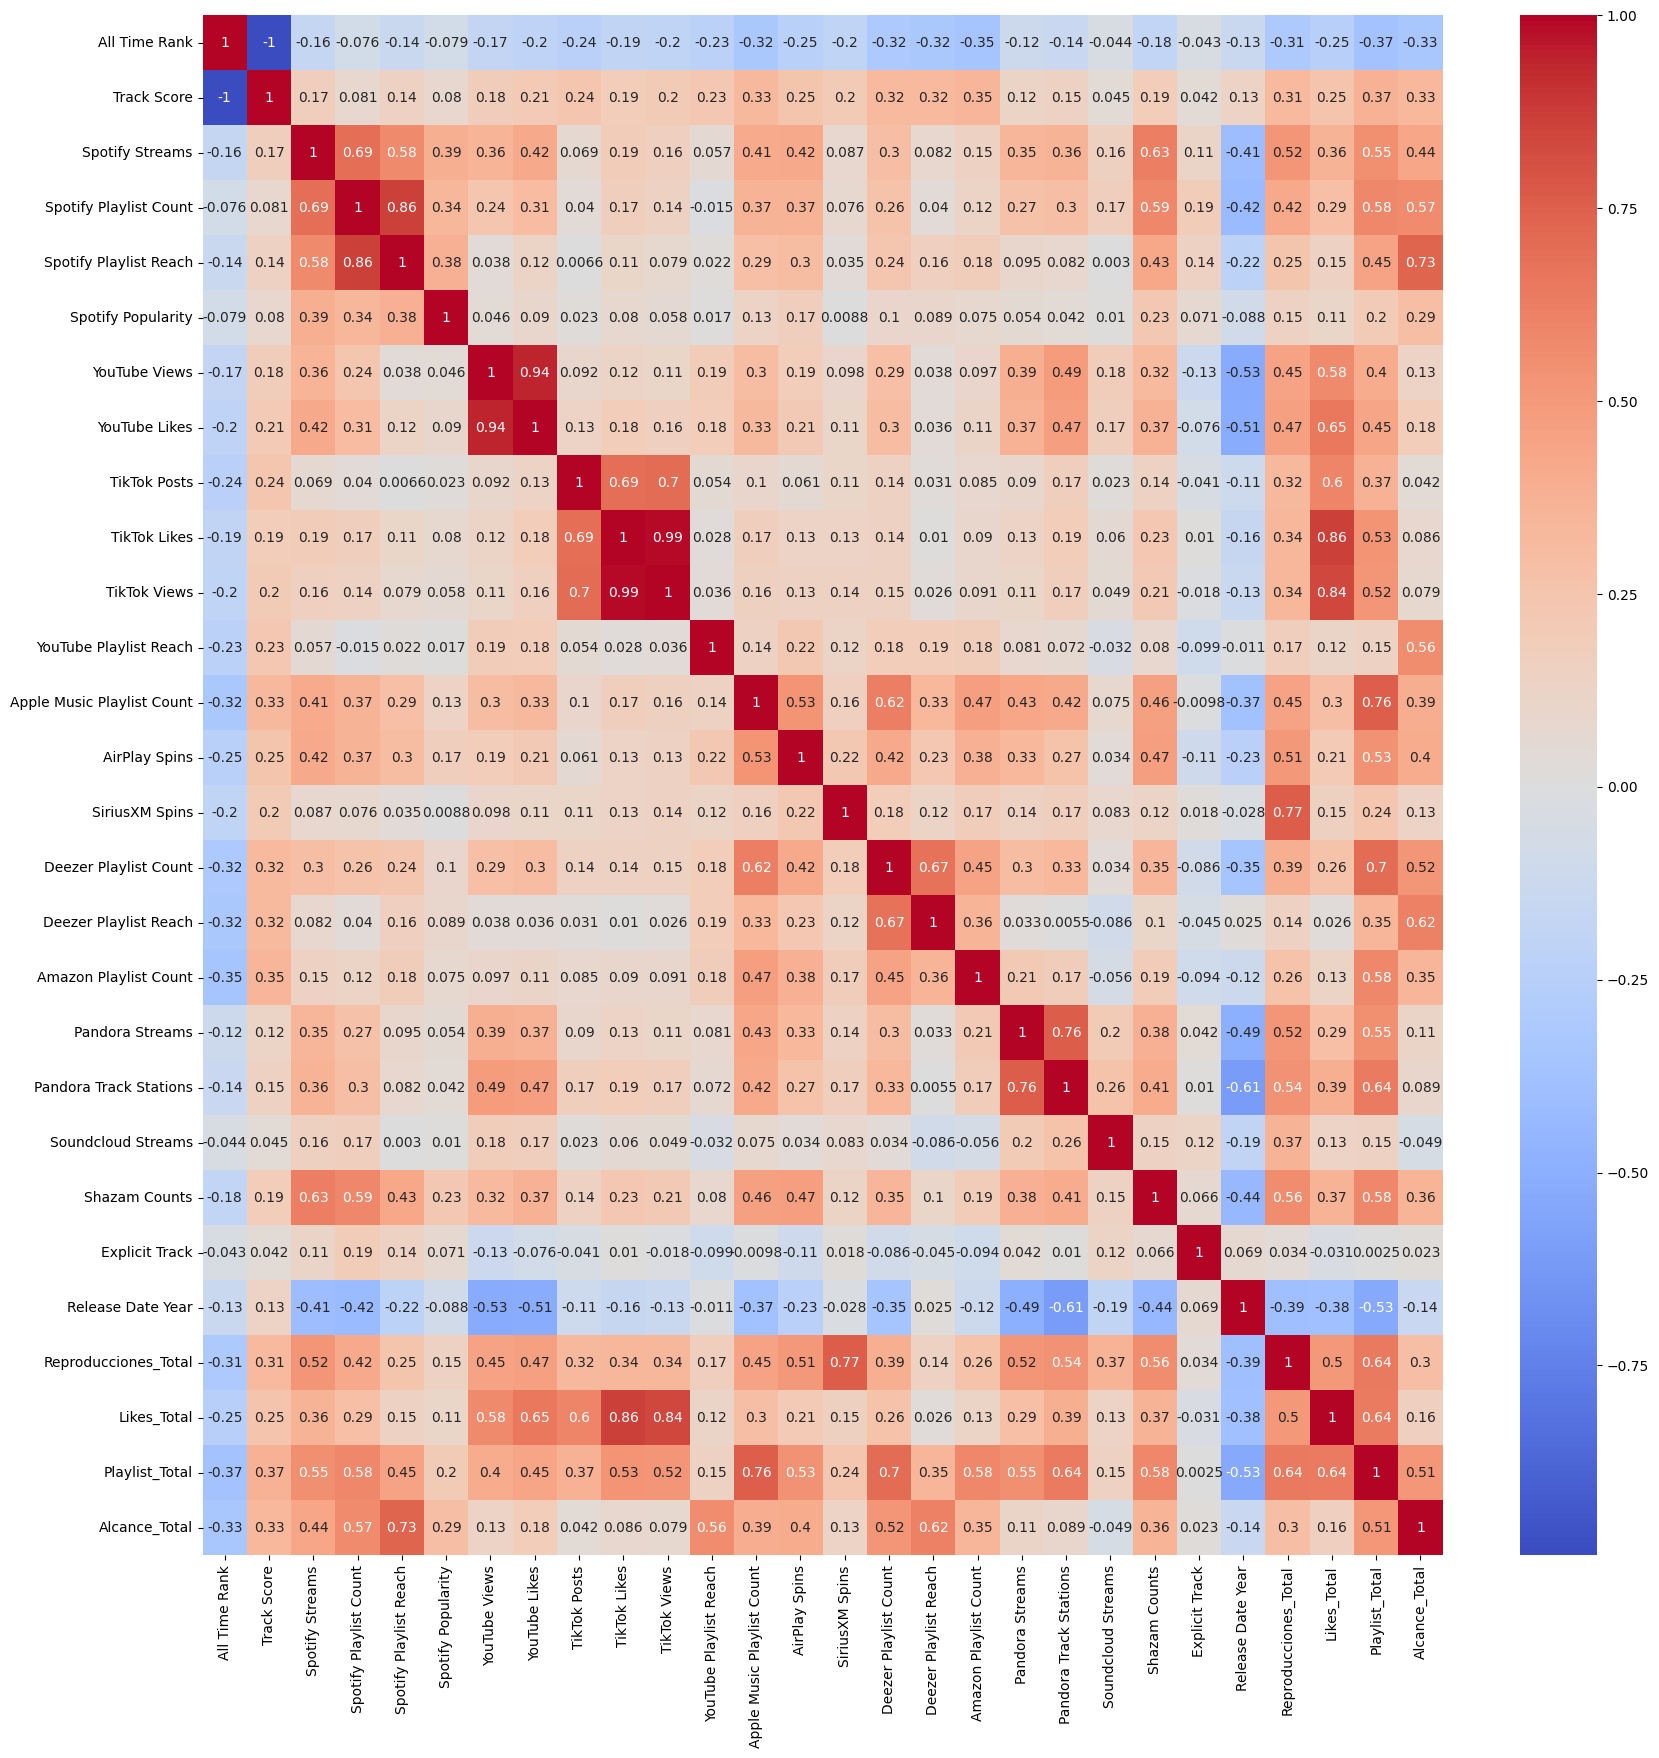

In [247]:
# Variables Adicionales
df_normalizado_add = df_normalizado.copy()
df_normalizado_add['Reproducciones_Total'] = df_normalizado_add[['Spotify Streams', 'YouTube Views', 'TikTok Posts', 'AirPlay Spins', 'SiriusXM Spins', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts']].mean(1)
df_normalizado_add['Likes_Total'] = df_normalizado_add[['YouTube Likes', 'TikTok Likes']].mean(1)
df_normalizado_add['Playlist_Total'] = df_normalizado_add[['Spotify Playlist Count', 'TikTok Views', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'Pandora Track Stations']].mean(1)
df_normalizado_add['Alcance_Total'] = df_normalizado_add[['Spotify Playlist Reach', 'YouTube Playlist Reach', 'Deezer Playlist Reach']].mean(1)

plt.figure(figsize=(20, 20))
sns.heatmap(df_normalizado_add.corr(numeric_only=True), annot=True, cmap='coolwarm');

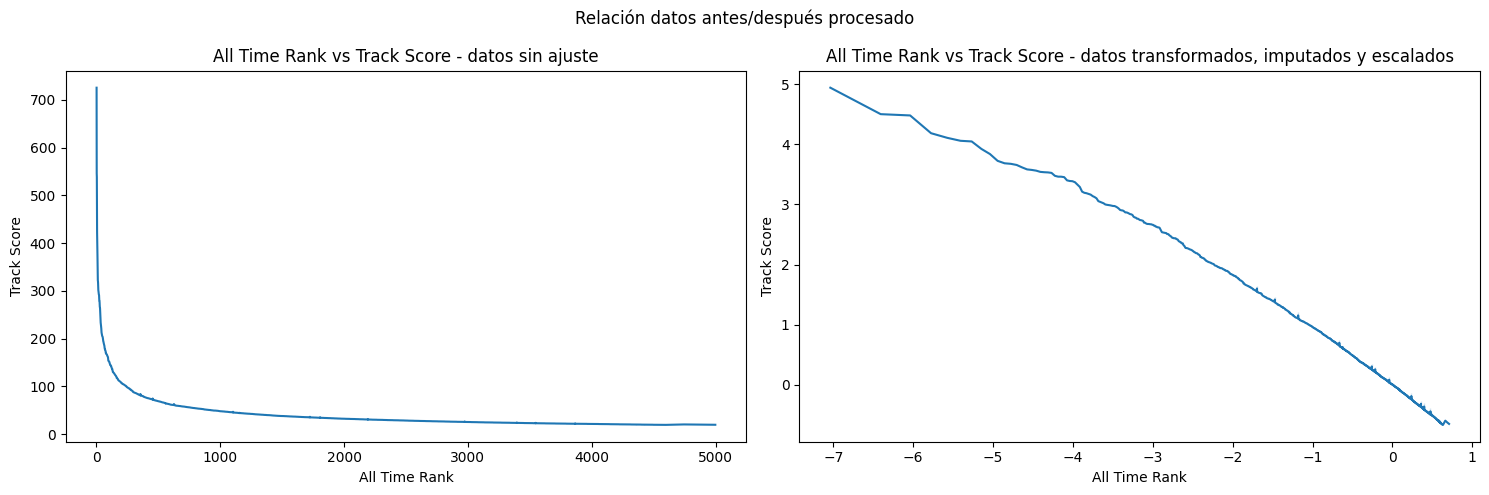

In [248]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.lineplot(data=df, x='All Time Rank', y='Track Score', ax=axs[0])
axs[0].set_title('All Time Rank vs Track Score - datos sin ajuste')

sns.lineplot(data=df_normalizado_add, x='All Time Rank', y='Track Score', ax=axs[1])
axs[1].set_title('All Time Rank vs Track Score - datos transformados, imputados y escalados')

fig.suptitle('Relación datos antes/después procesado')

plt.tight_layout()
plt.show()